<a href="https://colab.research.google.com/github/abhinav-syl/Brain-Tumour/blob/main/Brain_Tumor_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/drive/My Drive/Colab Notebooks/brainn.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/brainn')
zip_ref.close()

local_zip = '/content/drive/My Drive/Colab Notebooks/tumor.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tumor')
zip_ref.close()

local_zip = '/content/drive/My Drive/Colab Notebooks/test.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/test')
zip_ref.close()

In [ ]:
train_g_dir = os.path.join('/brainn/brainn/glioma_tumor')
train_m_dir = os.path.join('/brainn/brainn/meningioma_tumor')
train_n_dir = os.path.join('/brainn/brainn/no_tumor')
train_p_dir = os.path.join('/brainn/brainn/pituitary_tumor')


train_t_dir = os.path.join('/tumor/tumor')
train_no_dir = os.path.join('/tumor/normal')

test_g_dir = os.path.join('/test/test/Glioma')
test_m_dir = os.path.join('/test/test/Meningioma')
test_n_dir = os.path.join('/test/test/Normal')
test_p_dir = os.path.join('/test/test/Pituitary')


In [ ]:
train_g_name= os.listdir(train_g_dir)
print(train_g_name[:3])
train_m_name= os.listdir(train_m_dir)
print(train_m_name[:3])
train_n_name= os.listdir(train_n_dir)
print(train_n_name[:3])
train_p_name= os.listdir(train_p_dir)
print(train_p_name[:3])

train_t_name= os.listdir(train_t_dir)
print(train_t_name[:3]) 
train_no_name = os.listdir(train_no_dir)

test_g_name= os.listdir(test_g_dir)
print(train_g_name[:3])
test_m_name= os.listdir(test_m_dir)
print(train_m_name[:3])
test_n_name= os.listdir(test_n_dir)
print(train_n_name[:3])
test_p_name= os.listdir(test_p_dir)
print(train_p_name[:3])


['gg (73).jpg', 'gg (125).jpg', 'gg (356).jpg']
['m1(143).jpg', 'm2 (61).jpg', 'm (69).jpg']
['image (21).jpg', 'image.jpg', 'image(262).jpg']
['p (663).jpg', 'p (825).jpg', 'p (593).jpg']
['Image2594.jpg', 'Image3665.jpg', 'Image3271.jpg']
['gg (73).jpg', 'gg (125).jpg', 'gg (356).jpg']
['m1(143).jpg', 'm2 (61).jpg', 'm (69).jpg']
['image (21).jpg', 'image.jpg', 'image(262).jpg']
['p (663).jpg', 'p (825).jpg', 'p (593).jpg']


In [ ]:
print("length of training sets")
print("length of g tumour: ", len(os.listdir(train_g_dir)))
print("length of m tumour: ", len(os.listdir(train_m_dir)))
print("length of no tumor: ", len(os.listdir(train_n_dir)))
print("length of p tumor: ", len(os.listdir(train_p_dir)))

print("length of test sets")
print("length of g tumor: ", len(os.listdir(test_g_dir)))
print("length of m tumor: ", len(os.listdir(test_m_dir)))
print("length of no tumor: ", len(os.listdir(test_n_dir)))
print("length of p tumor: ", len(os.listdir(test_p_dir)))


length of training sets
length of g tumour:  827
length of m tumour:  822
length of no tumor:  395
length of p tumor:  827
length of test sets
length of g tumor:  83
length of m tumor:  89
length of no tumor:  110
length of p tumor:  89


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
datagen = ImageDataGenerator(
          rotation_range = 40,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          brightness_range = (0.5,1.5))



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrow = 4
ncol = 4

pic_index=0

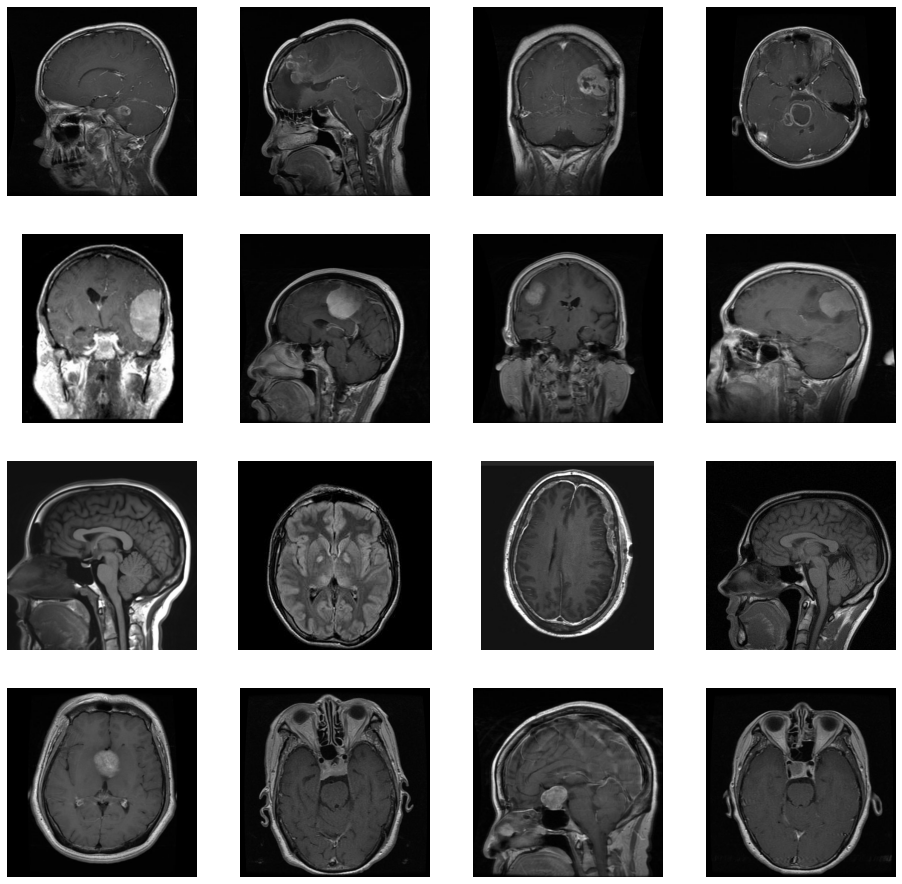

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nrow *4, ncol *4)

pic_index += 4

next_g_pic = [os.path.join(train_g_dir, fname)
                for fname in train_g_name[pic_index-4:pic_index]]
next_m_pic = [os.path.join(train_m_dir, fname)
                for fname in train_m_name[pic_index-4:pic_index]]
next_n_pic = [os.path.join(train_n_dir, fname)
                for fname in train_n_name[pic_index-4:pic_index]]
next_p_pic = [os.path.join(train_p_dir, fname)
                for fname in train_p_name[pic_index-4:pic_index]]
for i, img_path in enumerate(next_g_pic+next_m_pic+next_n_pic+next_p_pic):
  ct = plt.subplot(nrow, ncol, i+1)
  ct.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()




In [ ]:


import tensorflow as tf
from keras.utils.vis_utils import plot_model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

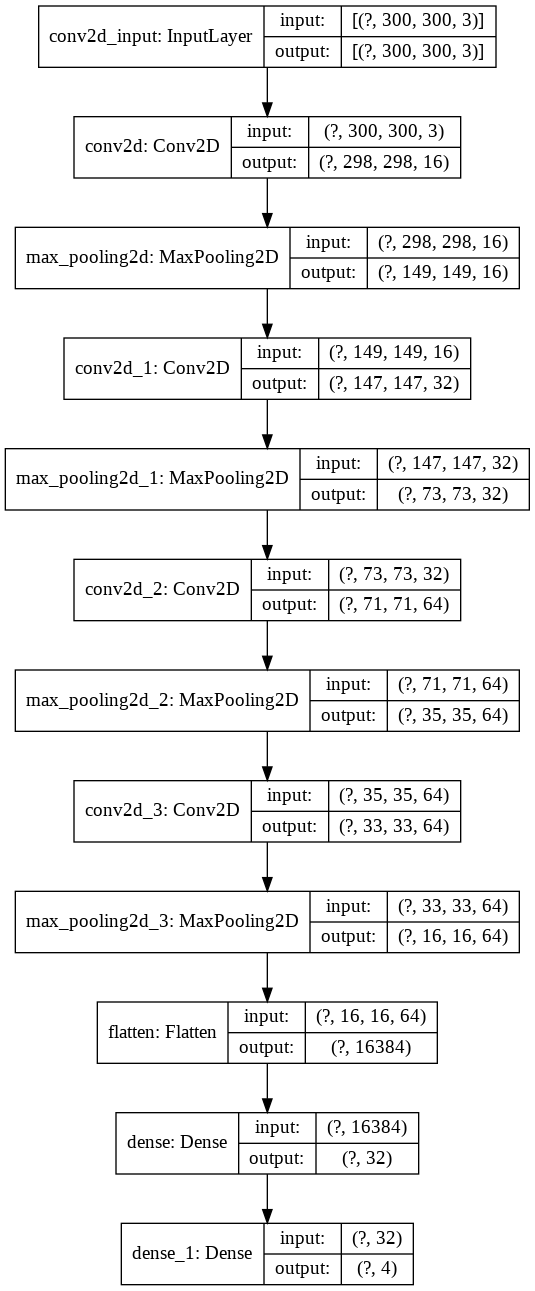

In [ ]:

model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (300,300,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv
     tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv3
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv4
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv5
     #tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     #tf.keras.layers.MaxPooling2D(2,2),
     #flatten
     tf.keras.layers.Flatten(),
     #dense
     tf.keras.layers.Dense(32,activation= "relu"),
     #Dropout
     #tf.keras.layers.Dropout(0.01),
     #output
     tf.keras.layers.Dense(4,activation = 'softmax')


])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr = 0.0005),
              metrics = ['acc']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                  '/brainn/brainn',
                  target_size = (300,300),
                  batch_size = 24,
                  class_mode = 'categorical'
)
train_t_datagen = ImageDataGenerator(rescale = 1/255)
train_tumor_generator = train_t_datagen.flow_from_directory(
                  '/tumor',
                   target_size = (300,300),
                   batch_size = 10,
                   class_mode = 'binary'   
    
)
test_datagen = ImageDataGenerator(rescale = 1/255) 
test_generator = test_datagen.flow_from_directory(
                 '/test/test',
                  target_size = (300,300),
                  batch_size = 10,
                  class_mode = 'categorical'
)
filenames = test_generator.filenames
nb_samples = len(filenames)


Found 2870 images belonging to 4 classes.
Found 428 images belonging to 2 classes.
Found 368 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs =24,
    steps_per_epoch = 20,
    verbose = 1,
    validation_data = test_generator
)
#model.predict(test_generator,nb_samples)


Epoch 1/24
20/20 [==============================] - 46s 2s/step - loss: 1.3325 - acc: 0.3771 - val_loss: 1.3232 - val_acc: 0.3832
Epoch 2/24
20/20 [==============================] - 45s 2s/step - loss: 1.0975 - acc: 0.5146 - val_loss: 1.0261 - val_acc: 0.5245
Epoch 3/24
20/20 [==============================] - 46s 2s/step - loss: 1.0121 - acc: 0.5437 - val_loss: 0.9363 - val_acc: 0.6386
Epoch 4/24
20/20 [==============================] - 45s 2s/step - loss: 0.9053 - acc: 0.5792 - val_loss: 0.9241 - val_acc: 0.6114
Epoch 5/24
20/20 [==============================] - 45s 2s/step - loss: 0.8296 - acc: 0.6875 - val_loss: 1.0897 - val_acc: 0.5272
Epoch 6/24
20/20 [==============================] - 45s 2s/step - loss: 0.8153 - acc: 0.6521 - val_loss: 0.7252 - val_acc: 0.7092
Epoch 7/24
20/20 [==============================] - 45s 2s/step - loss: 0.7248 - acc: 0.7083 - val_loss: 0.7156 - val_acc: 0.6793
Epoch 8/24
20/20 [==============================] - 45s 2s/step - loss: 0.6478 - acc: 0.73

In [ ]:
#img_width, img_height = 300, 300
#from keras.preprocessing import image
#import numpy as np
#img = image.load_img('/content/download.jpg', target_size = (img_width, img_height))
#img = image.img_to_array(img)
#img = np.expand_dims(img, axis = 0)
#classi = model.predict(img)
#print(classi[0])

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
def test():
 uploaded = files.upload()

 for fn in uploaded.keys():
   path = '/content/' + fn
   img = image.load_img(path = path , target_size = (300,300))
   x = image.img_to_array(img)
   x = np.expand_dims(x,axis=0)

   images = np.vstack([x])
   classes = model.predict(images, batch_size = 3)
   print(classes)

   return classes,fn



In [ ]:
classes,fn = test()
if(classes[0][0]>0.5):
   print(fn + " is a g tumor.")
   tm = 1
elif(classes[0][1]>0.5):
   print(fn+"is a m tumor")
   tm= 2
elif(classes[0][2]>0.5):
   print(fn + 'is a normal brain')
   tm = 3
else:
   print(fn + " contains a p tumour.")
   tm = 4

In [ ]:
print(tm)

In [ ]:
if (tm == 3):
  model = tf.keras.models.Sequential([
     #tf.keras.layers.Conv2D(8,(3,3), activation = "relu", input_shape = (300,300,3)),
     #tf.keras.layers.MaxPooling2D(2,2),
     #flatten
     tf.keras.layers.Flatten(),
     #dense
     tf.keras.layers.Dense(2,activation= "relu"),
     #dense2
     tf.keras.layers.Dense(4,activation = "relu"),
     #Dropout
     tf.keras.layers.Dropout(0.08),
     #output
     tf.keras.layers.Dense(1,activation = 'sigmoid')


])

  

In [ ]:
if tm==3:
 model.compile(loss='binary_crossentropy',
               optimizer = RMSprop(lr = 0.0002),
               metrics = ['acc']
               )
 train_datagen = ImageDataGenerator(rescale = 1/255)
 train_generator = train_datagen.flow_from_directory(
                   '/tumor',
                   target_size = (300,300),
                   batch_size = 12,
                   class_mode = 'binary'
)


Epoch 1/2
30/30 [==============================] - 8s 275ms/step - loss: 0.3766 - acc: 0.9194
Epoch 2/2
30/30 [==============================] - 8s 256ms/step - loss: 0.3658 - acc: 0.9185
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 540002    
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 12        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 540,019
Trainable params: 540,019
Non-trainable pa

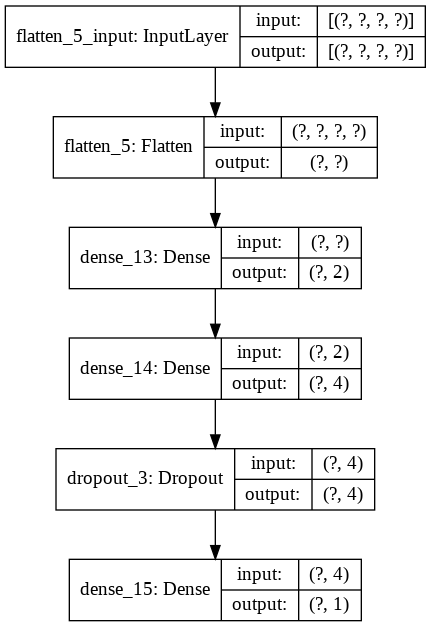

In [ ]:
history = model.fit(
      train_generator,
      epochs = 2,
      steps_per_epoch = 30,
      verbose =1
  )
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
def test(fn):
   path = '/content/' + fn
   img = image.load_img(path = path , target_size = (300,300))
   x = image.img_to_array(img)
   x = np.expand_dims(x,axis=0)

   images = np.vstack([x])
   classes = model.predict(images, batch_size = 3)
   print(classes)
   return classes,fn
  

In [ ]:
classes,fn = test(fn)
if (classes[0]>0.5):
  print(fn+" a tumor is present")
  tm1 = 0 
else:
  print(fn+" a tumor is not present")
  tm1 = 1

[[0.]]
3.jpg a tumor is not present


In [ ]:
if (tm==0 and tm1==0):
  print("an imaging test is needed, please get another MRI or CT scan")
if (tm==1 and tm1==1):
  print("no brain tumor was detected, please refer to a consultant.")
else:
  print("tests are unclear contact your medical consultant for their advice")

tests are unclear contact your medical consultant for their advice


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_name]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_name]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) 

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')